# Telecom X – Análisis de Evasión de Clientes (Churn)

**Proyecto de ETL y Análisis Exploratorio de Datos**


#📌 Extracción

In [3]:
import pandas as pd
import requests


In [4]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()


In [5]:
df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df.shape


(7267, 6)

#🔧 Transformación

#Conoce el conjunto de datos

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#Expansión de columnas anidadas

In [9]:
df_expanded = pd.json_normalize(df.to_dict(orient="records"))
df_expanded.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Comprobación de incoherencias

**Valores nulos**

In [10]:
df_expanded.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Se realizó una verificación de valores ausentes en el conjunto de datos.  
Los resultados muestran que no existen valores nulos en ninguna de las columnas,
por lo que no fue necesario aplicar técnicas de imputación o eliminación de registros.


**Duplicados**

In [12]:
df_expanded.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [16]:
df_expanded = pd.concat(
    [
        df.drop(columns=['customer', 'phone', 'internet', 'account']),
        pd.json_normalize(df['customer']).add_prefix('customer_'),
        pd.json_normalize(df['phone']).add_prefix('phone_'),
        pd.json_normalize(df['internet']).add_prefix('internet_'),
        pd.json_normalize(df['account']).add_prefix('account_')
    ],
    axis=1
)


In [17]:
df_expanded.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Normalización de datos anidados

El conjunto de datos contenía columnas con estructuras anidadas en formato JSON
(customer, phone, internet y account).  
Para facilitar el análisis y la detección de inconsistencias, estos campos fueron
normalizados y convertidos en columnas planas mediante `json_normalize`.


#Manejo de inconsistencias
No se detectaron valores nulos ni duplicados, por lo que no fue necesario realizar imputaciones o eliminaciones

#📊 Carga y análisis

#Análisis descriptivo

In [13]:
df_expanded.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [19]:
df_expanded.columns





Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [20]:
df_expanded.groupby('Churn')['account.Charges.Total'].describe()


,count,unique,top,freq
Churn,,,,
,224,223,19.55,2
No,5174,4966,,11
Yes,1869,1732,20.2,6


#Distribución de evasión

In [21]:
df_expanded['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [22]:
import matplotlib.pyplot as plt


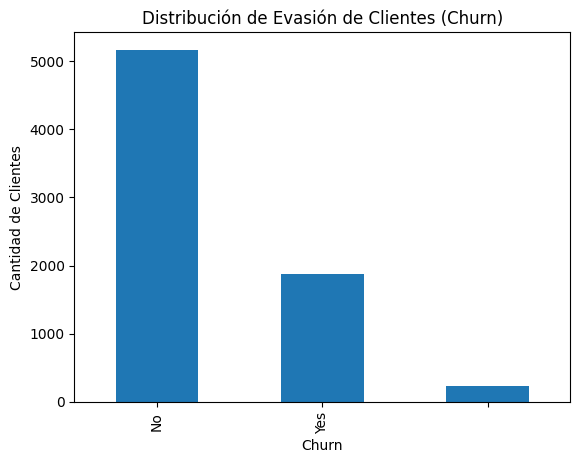

In [23]:
df_expanded['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()


### Distribución de evasión de clientes (Churn)

La variable Churn muestra que la mayoría de los clientes permanecen en la empresa.  
Sin embargo, existe una proporción significativa de clientes que cancelan el servicio,
lo que representa un punto crítico para la estrategia de retención de Telecom X.


#Recuento de evasión por variables categóricas

In [25]:
pd.crosstab(df_expanded['account.Contract'], df_expanded['Churn'])



Churn,,No,Yes
account.Contract,,,
Month-to-month,130,2220,1655
One year,46,1307,166
Two year,48,1647,48


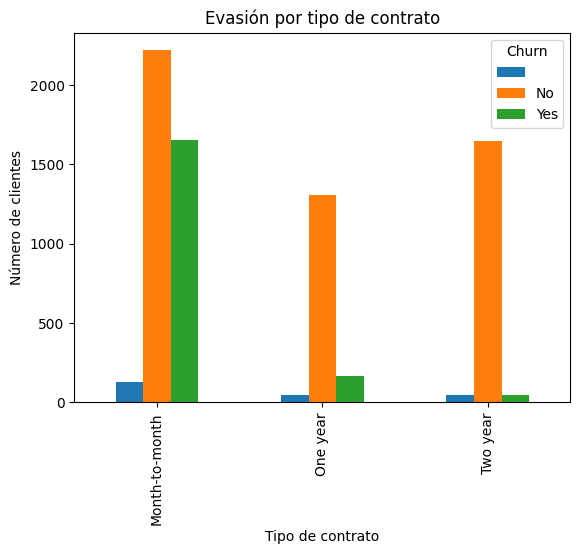

In [27]:
pd.crosstab(df_expanded['account.Contract'], df_expanded['Churn']).plot(kind='bar')
plt.title('Evasión por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.show()




### Evasión de clientes según tipo de contrato

El análisis evidencia que los clientes con contratos mensuales (Month-to-month)
presentan una tasa de evasión considerablemente mayor en comparación con los
clientes que cuentan con contratos de uno o dos años.

Esto sugiere que los contratos de mayor duración están asociados a una mayor
retención de clientes, representando una posible estrategia para reducir la evasión.



#Conteo de evasión por variables numéricas

In [29]:
df_expanded.groupby('Churn')['customer.tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
,224.0,31.571429,24.998552,1.0,7.0,29.0,56.0,72.0
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


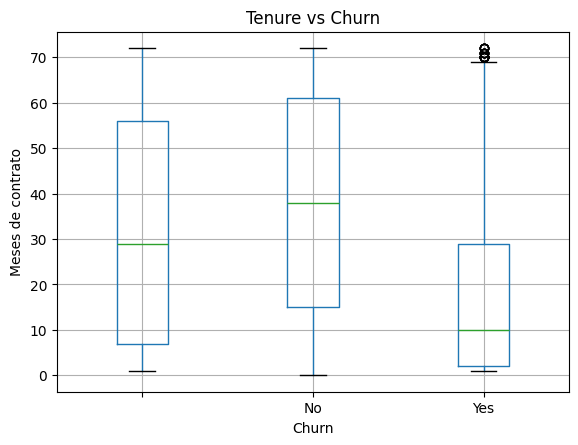

In [31]:
df_expanded.boxplot(column='customer.tenure', by='Churn')
plt.title('Tenure vs Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de contrato')
plt.show()


##Análisis de evasión de clientes
•	El análisis del gasto total acumulado muestra diferencias significativas entre los clientes que permanecen en la empresa y aquellos que cancelan el servicio.

•	Los clientes que no presentan evasión tienen un gasto total promedio superior (≈ 2555) en comparación con los clientes que abandonan el servicio (≈ 1532).

•	Asimismo, la mediana del gasto de los clientes con evasión es considerablemente menor, lo que sugiere que estos clientes cancelan el servicio en etapas tempranas.

•	Estos resultados indican que la evasión está asociada principalmente a clientes con menor permanencia y menor gasto acumulado, lo que resalta la importancia de estrategias de retención temprana.


#📄Informe final

## Informe Final

### Introducción
El objetivo de este análisis es comprender los factores asociados a la evasión
de clientes (Churn) en la empresa Telecom X.

### Limpieza y tratamiento de datos
Los datos fueron extraídos desde una API en formato JSON, transformados a un
DataFrame y expandidos para facilitar su análisis. No se identificaron valores
nulos ni duplicados.

### Análisis exploratorio
Se realizaron análisis descriptivos y visualizaciones que permitieron identificar
diferencias claras entre clientes que permanecen y los que cancelan el servicio.

### Conclusiones e insights
Los clientes que presentan evasión tienen menor tiempo de contrato y menor gasto
total acumulado, lo que sugiere cancelaciones tempranas.

### Recomendaciones
Se recomienda implementar estrategias de retención temprana, especialmente para
clientes con contratos mensuales y bajo tiempo de permanencia.
